In [45]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [46]:
import numpy as np
from statsmodels.tsa.arima_model import ARIMA

In [49]:
df=pd.read_csv('Test_Scenario4.csv')

In [50]:
df["DEP_DATE_2"]=""
for i in range(len(df)):
    df["DEP_DATE_2"][i]=datetime.datetime.strptime(df["DEP_DATE"][i], '%d-%m-%Y %H:%M')

C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
df=df[["DEP_DATE_2","NET_BOOKINGS"]]

In [52]:
df = df.set_index('DEP_DATE_2')

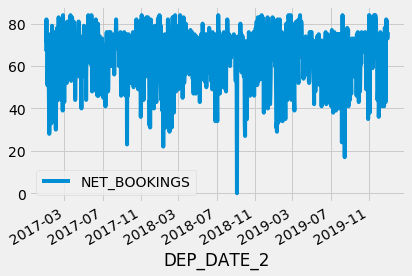

In [53]:
df.plot()
plt.show()

In [54]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

In [55]:
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [56]:
X = df.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  728
Model:                     ARMA(7, 1)   Log Likelihood               -3010.650
Method:                       css-mle   S.D. of innovations             15.126
Date:                Wed, 10 Mar 2021   AIC                           6041.300
Time:                        07:48:55   BIC                           6087.203
Sample:                             0   HQIC                          6059.011
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8174      0.632     -1.293      0.197      -2.057       0.422
ar.L1.y        0.1419      0.258      0.550      0.583      -0.364       0.648
ar.L2.y       -0.1052      0.041     -2.593      0.0

In [57]:
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]

In [58]:
forecast

array([0.66297063])

In [59]:
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

Forecast: 82.662971


In [71]:
forecast = model_fit.forecast(steps=30)

In [72]:
forecast=forecast[0]

In [81]:
history = [x for x in X]
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    day += 1

Day 1: 82.662971
Day 2: 82.771819
Day 3: 74.658657
Day 4: 72.985816
Day 5: 70.969517
Day 6: 58.529874
Day 7: 61.662284
Day 8: 64.595633
Day 9: 50.789935
Day 10: 30.422611
Day 11: 32.037196
Day 12: 27.918369
Day 13: 57.007341
Day 14: 81.148599
Day 15: 32.306467
Day 16: 62.310391
Day 17: 33.211831
Day 18: 37.133404
Day 19: 33.119944
Day 20: 56.148998
Day 21: 81.189978
Day 22: 35.215724
Day 23: 52.207419
Day 24: 43.183317
Day 25: 46.168269
Day 26: 46.168534
Day 27: 49.177630
Day 28: 75.187195
Day 29: 62.190654
Day 30: 33.186984


In [93]:
history = [x for x in X]
df_30 = pd.DataFrame(columns=['day', 'forecast'])
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print('Day %d: %f' % (day, inverted))
    values_to_add = {'day': day, 'forecast': inverted}
    row_to_add = pd.Series(values_to_add)
    df_30 = df_30.append(row_to_add, ignore_index=True)

Day 1: 82.662971
Day 1: 83.771819
Day 1: 82.658657
Day 1: 80.985816
Day 1: 79.969517
Day 1: 80.529874
Day 1: 80.662284
Day 1: 81.595633
Day 1: 81.789935
Day 1: 81.422611
Day 1: 81.037196
Day 1: 80.918369
Day 1: 81.007341
Day 1: 81.148599
Day 1: 81.306467
Day 1: 81.310391
Day 1: 81.211831
Day 1: 81.133404
Day 1: 81.119944
Day 1: 81.148998
Day 1: 81.189978
Day 1: 81.215724
Day 1: 81.207419
Day 1: 81.183317
Day 1: 81.168269
Day 1: 81.168534
Day 1: 81.177630
Day 1: 81.187195
Day 1: 81.190654
Day 1: 81.186984


In [95]:
df_30.to_csv('30 Days Forecast')